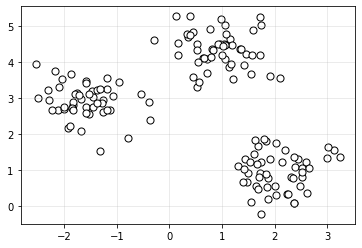

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolors='black', s=50)
plt.grid(alpha=0.3)
plt.show()

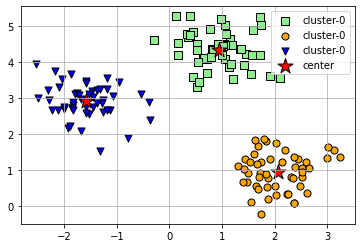

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster-0')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', marker='o', edgecolors='black', label='cluster-0')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='blue', marker='v', edgecolors='black', label='cluster-0')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolors='black', label='center')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

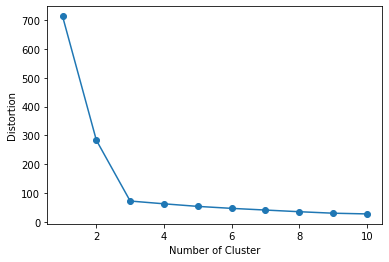

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion')
plt.show()

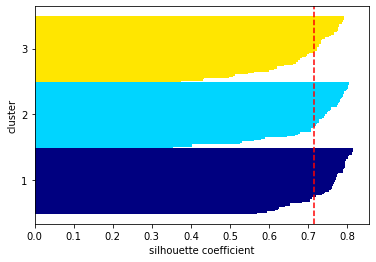

In [6]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('silhouette coefficient')
plt.show()

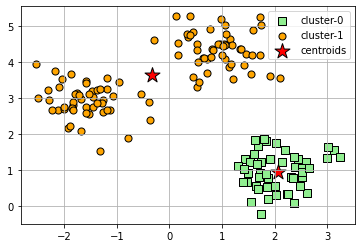

In [8]:
# show a bad clustering
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0, 0], X[y_km==0, 1], color='lightgreen', s=50, edgecolor='black', marker='s', label='cluster-0')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], color='orange', s=50, edgecolor='black', marker='o', label='cluster-1')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', s=250, edgecolor='black', marker='*', label='centroids')
plt.legend()
plt.grid()
plt.show()

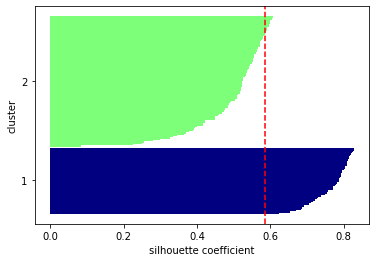

In [9]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [10]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [11]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [15]:
from scipy.cluster.hierarchy import linkage
# row_clusters = linkage(pdist(df, metrics='euclidean'), method='complete')
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no of items in cluster'], index=['cluster %d' % d for d in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no of items in cluster
cluster 0,0.0,4.0,3.835396,2.0
cluster 1,1.0,2.0,4.347073,2.0
cluster 2,3.0,5.0,5.899885,3.0
cluster 3,6.0,7.0,8.316594,5.0


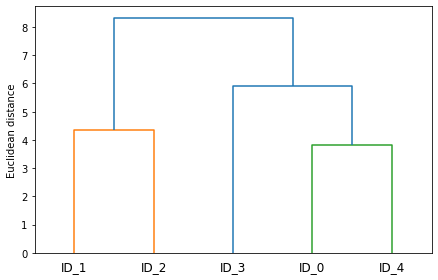

In [16]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

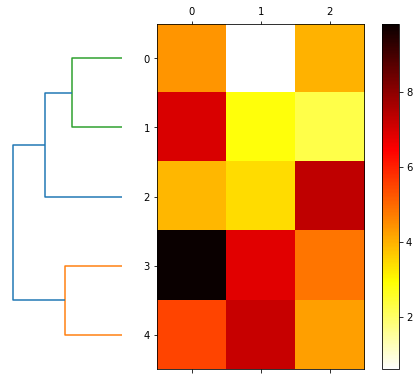

In [24]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
# axm.set_xticklabels[[''] + df_rowclust.columns]
# axm.set_yticklabels[[''] + list(df_rowclust.index)]
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print("Cluster labels: %s" % labels)

Cluster labels: [1 0 0 2 1]


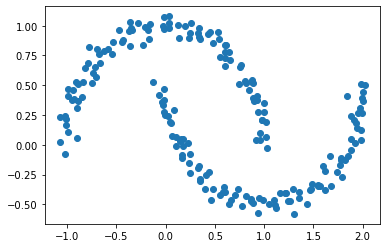

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

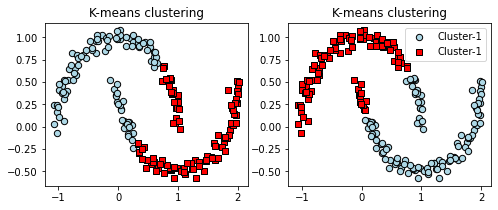

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], color='lightblue', edgecolor='black', marker='o', s=40, label='Cluster-1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], color='red', edgecolor='black', marker='s', s=40, label='Cluster-1')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], color='lightblue', edgecolor='black', marker='o', s=40, label='Cluster-1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], color='red', edgecolor='black', marker='s', s=40, label='Cluster-1')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

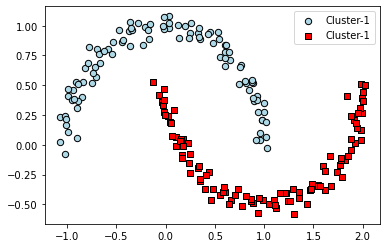

In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = dbscan.fit_predict(X)
plt.scatter(X[y_db==0, 0], X[y_db==0, 1], color='lightblue', edgecolor='black', marker='o', s=40, label='Cluster-1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], color='red', edgecolor='black', marker='s', s=40, label='Cluster-1')
plt.legend()
plt.show()